In [122]:
# auto reload when source code changes
%load_ext autoreload
%autoreload 2

# include  folder in path
import os, sys, math
import numpy as np

sys.path.append('../sanode') # Adds higher directory to python modules path.

import aicsPlot

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


   SAN1 [21.256964273856166, 19.008780131482833]
   SAN2 [28.156973512878338, 20.692985659913113]
   SAN3 [15.486733644986794, 12.68582314087842]
   SAN4 [23.74271958963223, 14.501648906458128]
  superiorList: [21.256964273856166, 28.156973512878338, 15.486733644986794, 23.74271958963223]
  inferiorList: [19.008780131482833, 20.692985659913113, 12.68582314087842, 14.501648906458128]


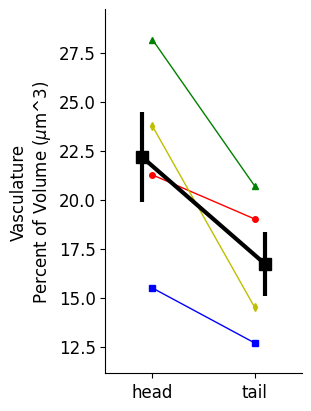

In [123]:
# Density-Result-ch{channel}.csv is created with 'python aicsMaskDen.py'
channel = 2
csvFile = f'../Density-Result-ch{channel}.csv'
superiorList, inferiorList = aicsPlot.plotMaskDensity(channel=channel, csvFile=csvFile)

# append mean +/- se


In [124]:
# do stats on return from aicsPlot.plotMaskDensity

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

# do stats
import scipy
alternative = 'greater' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('superiorList:', superiorList)
print('inferiorList:', inferiorList)
print('wilcoxon pValue:', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest pValue:', pValue)


superiorList: [21.256964273856166, 28.156973512878338, 15.486733644986794, 23.74271958963223]
inferiorList: [19.008780131482833, 20.692985659913113, 12.68582314087842, 14.501648906458128]
wilcoxon pValue: 0.0625
paired ttest pValue: 0.0511374924790585


SAN1 [3.1887543201446533, 4.77637243270874]
SAN2 [3.997901201248169, 5.162961483001709]
SAN3 [3.519838571548462, 14.416007995605467]
SAN4 [2.9448969364166264, 13.07952880859375]


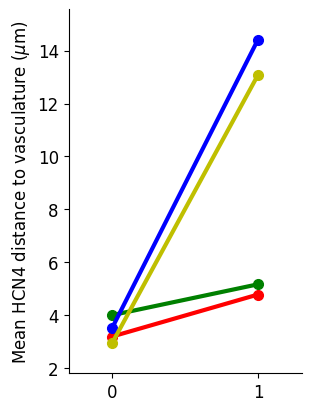

SAN1 [2.617922306060791, 3.935267448425293]
SAN2 [2.7070512771606445, 4.318610191345215]
SAN3 [3.003514528274536, 8.01746940612793]
SAN4 [2.6774215698242188, 4.971847057342528]


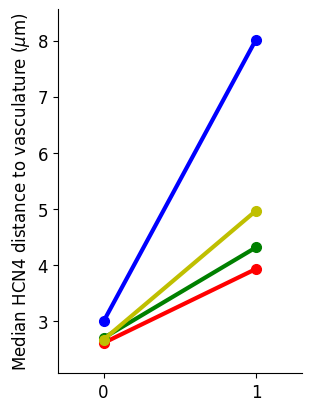

In [125]:
# this requires a file
#os.path.isfile('saNode/hcn4-Distance-Result.csv')

superiorList, inferiorList = aicsPlot.plotMeanDist(csvFile='../hcn4-Distance-Result.csv', statCol='mean')
superiorList, inferiorList = aicsPlot.plotMeanDist(csvFile='../hcn4-Distance-Result.csv', statCol='median')

In [120]:
# do stats on return from aicsPlot.plotMaskDensity

def getStats(theList):
    theMean = np.nanmean(theList)
    theStd = np.nanstd(theList)
    theN = len(theList)
    theSem = theStd / math.sqrt(theN)
    return theMean, theStd, theN, theSem

# get mean/sd/n from each superior/inferior
sMean, sStd, sSem, sN = getStats(superiorList)
iMean, iStd, iSem, iN = getStats(inferiorList)

print('superiorList:', superiorList)
print('inferiorList:', inferiorList)

# do stats
import scipy
alternative = 'less' #(“two-sided”, “greater”, “less”)
mode = 'exact'
stat, pValue = scipy.stats.wilcoxon(x=superiorList, y=inferiorList, alternative=alternative, mode=mode)
print('wilcoxon pValue:', pValue)

stat, pValue = scipy.stats.ttest_rel(superiorList, inferiorList)
print('paired ttest pValue:', pValue)


superiorList: [2.617922306060791, 2.7070512771606445, 3.003514528274536, 2.6774215698242188]
inferiorList: [3.935267448425293, 4.318610191345215, 8.01746940612793, 4.971847057342528]
wilcoxon pValue: 0.0625
paired ttest pValue: 0.056111683096255104


In [23]:
# SAN2
'''
pathList = [
    '/media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]
'''
# SAN3
if 1:
    pathList = [
        '/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
        #'/media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
        '/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
        ]
# SAN4
if 0:
    pathList = [
        '/media/cudmore/data/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
        '/media/cudmore/data/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
        '/media/cudmore/data/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
        ]


In [24]:
## Plot histograms of slab diameters

=== bVascularTracing.load() /media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.h5f
    loaded nodes: 670 edges: 854 slabs: 19868 in 0.11 seconds
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.h5f
    loaded nodes: 255 edges: 272 slabs: 13199 in 0.04 seconds
1 path:/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
  mean:6.85 sd:2.12 n:14345 min:3.11 max:15.54
2 path:/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
  mean:6.68 sd:1.9 n:10992 min:3.11 max:15.54


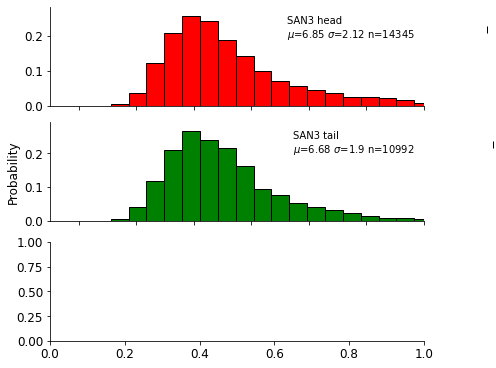

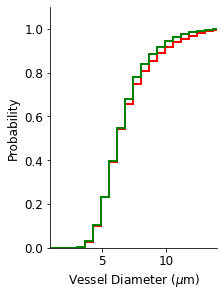

In [25]:

aicsPlot.plotSlabDiamHist(pathList)

In [50]:
# get the mean/sd/n of edge diameters
# SAN2
tmpPathList = []
tmpPathList += [
    '/media/cudmore/data/san-density/SAN1/SAN1_head/aicsAnalysis/SAN1_head_ch2.tif',
    #'/media/cudmore/data/san-density/SAN1/SAN1_mid/aicsAnalysis/SAN1_mid_ch2.tif',
    #'/media/cudmore/data/san-density/SAN1/SAN1_tail/aicsAnalysis/SAN1_tail_ch2.tif',
    ]
tmpPathList += [
    '/media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    #'/media/cudmore/data/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]
# SAN3
tmpPathList += [
    '/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    #'/media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]
# SAN4
tmpPathList += [
    '/media/cudmore/data/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
    #'/media/cudmore/data/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
    ]

meanList, sdList, medianList, nList = aicsPlot.plotEdgeDiamHist(tmpPathList, doPlot=False)

print('mean:', meanList)
print('sd:', sdList)
print('median:', medianList)
print('n:', nList)


plotEdgeDiamHist():
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN1/SAN1_head/aicsAnalysis/SAN1_head_ch2.h5f
    loaded nodes: 1795 edges: 2189 slabs: 54377 in 0.29 seconds
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.h5f
    loaded nodes: 3791 edges: 5003 slabs: 83862 in 0.62 seconds
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.h5f
    loaded nodes: 1667 edges: 2086 slabs: 61050 in 0.27 seconds
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.h5f
    loaded nodes: 670 edges: 854 slabs: 19868 in 0.11 seconds
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.h5f
    loaded nodes: 255 edges: 272 slabs: 13199 in 0.04 seconds
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.h5f
    loaded nodes: 1887 edges

(0.0, 14.0)

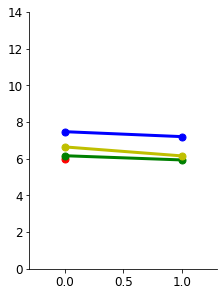

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# copy/pase mean diam from above
san1_meanDiam = [5.96, np.nan]
san2_meanDiam = [6.16, 5.93]
san3_meanDiam = [7.47, 7.2]
san4_meanDiam = [6.64, 6.15]


aicsPlot.defaultPlotLayout()

plt.plot(san1_meanDiam, color='r')
plt.plot(san2_meanDiam, color='g')
plt.plot(san3_meanDiam, color='b')
plt.plot(san4_meanDiam, color='y')

plt.ylim(0, 14)

plotEdgeDiamHist():
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.h5f
    loaded nodes: 670 edges: 854 slabs: 19868 in 0.11 seconds
taking random sample for idx 0, n= 217
=== bVascularTracing.load() /media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.h5f
    loaded nodes: 255 edges: 272 slabs: 13199 in 0.04 seconds
  minNumberOfSlabs: 5
1 path:/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
  mean:7.47 sd:1.89 n:217 min:4.15 max:14.29
2 path:/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif
  x/y/z voxel size:[0.6214808646041788, 0.6214808646041788, 1]
  mean:7.2 sd:2.05 n:217 min:3.99 max:15.54
setting hist y-axis to [0,0.42] for san3
setting hist y-axis to [0,0.42] for san3


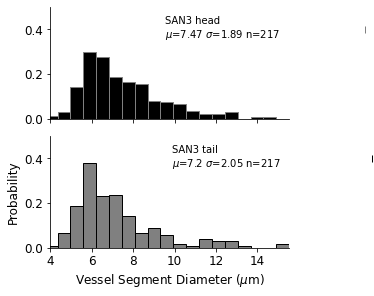

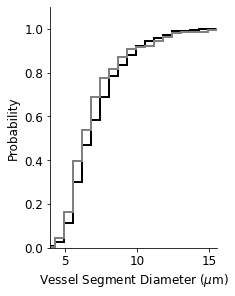

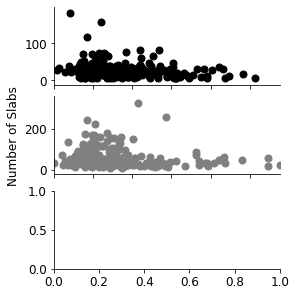

([7.47, 7.2], [1.89, 2.05], [217, 217])

In [78]:

tmpPathList2 = [
    '/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    #'/media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]

aicsPlot.plotEdgeDiamHist(tmpPathList2)

## Plot the distribution of HCN4 distance to Vasculature

- X-Axis values are the distance of each HCN4 pixel to the nearest vasculature
- Each pixel in HCN4 mask contibutes n=1 to the histogram
- For some dataset (e.g. San3 and San4) I am getting 2x peaks in the distribution. This is due to HCN4 positive cells in regions where there is simple no vasculature


In [14]:
# try and average cumulative hist across san 1/2/3/4
goodDistList = []

# san2
pathList = [
    '/media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]

goodDist = aicsPlot.plot_hcn4_dist_hist(pathList, doPlot=False)
    # goodDist is a list where list[i] are all distances (make cum hist from this)
goodDistList.append(goodDist)

# san3
pathList = [
    '/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]

goodDist = aicsPlot.plot_hcn4_dist_hist(pathList, doPlot=False)
    # goodDist is a list where list[i] are all distances (make cum hist from this)
goodDistList.append(goodDist)

# san4
pathList = [
    '/media/cudmore/data/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
    ]

goodDist = aicsPlot.plot_hcn4_dist_hist(pathList, doPlot=False)
    # goodDist is a list where list[i] are all distances (make cum hist from this)
goodDistList.append(goodDist)



=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif
  mean:3.890000104904175 sd:3.869999885559082 n:25325370 min:0.4000000059604645 max:24.0
  mean:4.150000095367432 sd:3.4000000953674316 n:13135206 min:0.4000000059604645 max:24.0
  mean:5.159999847412109 sd:3.799999952316284 n:6222961 min:0.4000000059604645 max:24.0
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif
  mean:3.450000047683716 sd:2.3399999141693115 n:2644482 min:0.6200000047683716 max:24.0
  mean:6.329

In [13]:
# goodDistList [i] is for san 2/3/4
# goodDistList[i][0] is all distances for san2 head
# goodDistList[i][1] is all distances for san2 mid
# goodDistList[i][2] is all distances for san2 tail

print(len(goodDistList[0]))


25325370


=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif
  mean:3.89 sd:3.869999885559082 n:25325370 min:0.4000000059604645 max:24.0
  mean:5.16 sd:3.799999952316284 n:6222961 min:0.4000000059604645 max:24.0


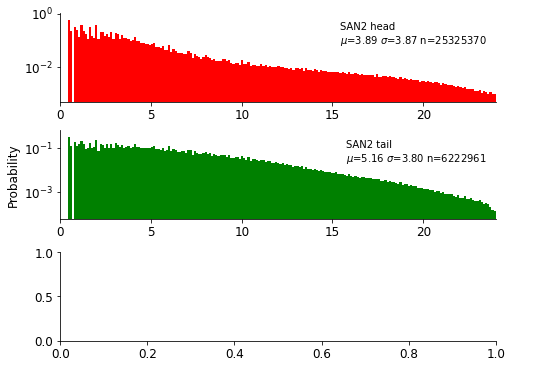

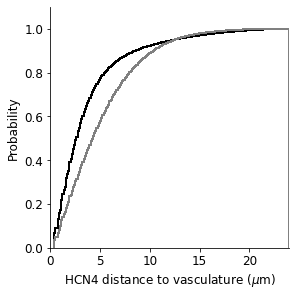

[array([5.930095 , 5.916741 , 5.930095 , ..., 1.7787815, 1.9887382,
        2.1419365], dtype=float32),
 array([4.5056396 , 4.892797  , 5.2815285 , ..., 0.7954953 , 0.39774764,
        0.39774764], dtype=float32)]

In [80]:
# SAN2
pathList = [
    '/media/cudmore/data/san-density/SAN2/SAN2_head/aicsAnalysis/SAN2_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_mid/aicsAnalysis/SAN2_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN2/SAN2_tail/aicsAnalysis/SAN2_tail_ch2.tif',
    ]

aicsPlot.plot_hcn4_dist_hist(pathList)

=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif
	  	mean:3.45 sd:2.34 n:2644482
		min:0.62 max:24.00
		median:3.00
	  	mean:6.33 sd:4.71 n:3229538
		min:0.62 max:24.00
		median:5.19
	  	mean:7.49 sd:5.43 n:3193203
		min:0.62 max:24.00
		median:6.21


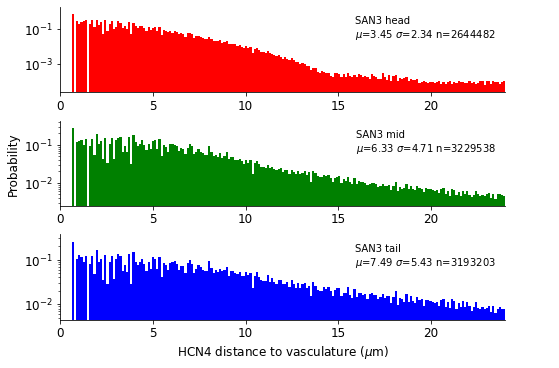

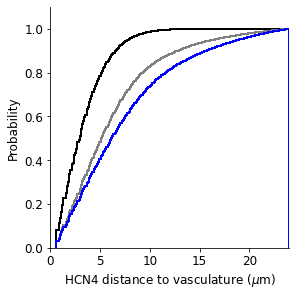

[array([6.6276455, 7.0511885, 7.502354 , ..., 5.593328 , 6.2148085,
        6.8362894], dtype=float32),
 array([8.978771 , 8.978771 , 9.000255 , ..., 2.63672  , 1.3896735,
        1.7578133], dtype=float32),
 array([2.       , 2.0943348, 2.1845999, ..., 6.1523466, 6.6064324,
        6.948367 ], dtype=float32)]

In [84]:
# SAN3
pathList = [
    '/media/cudmore/data/san-density/SAN3/SAN3_head/aicsAnalysis/SAN3_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_mid/aicsAnalysis/SAN3_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN3/SAN3_tail/aicsAnalysis/SAN3_tail_ch2.tif',
    ]
aicsPlot.plot_hcn4_dist_hist(pathList)

=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif
=== aicsMyocyteDistToVasc() /media/cudmore/data/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif
  mean:2.940000057220459 sd:1.9199999570846558 n:6162298 min:0.5 max:20.90999984741211
  mean:3.2100000381469727 sd:2.2799999713897705 n:5478112 min:0.5 max:23.989999771118164
  mean:5.309999942779541 sd:5.110000133514404 n:1744306 min:0.5 max:24.0


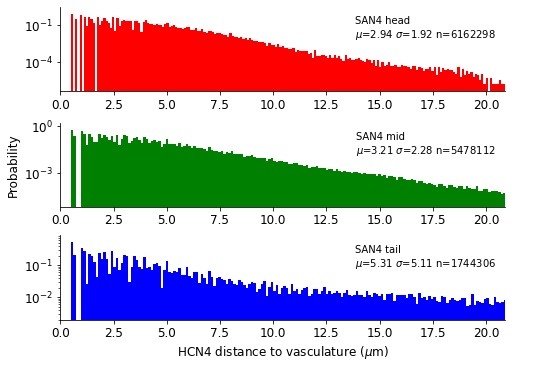

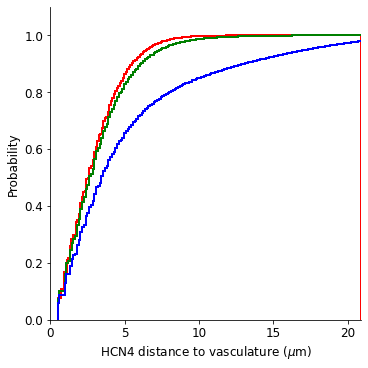

In [111]:
# SAN4
pathList = [
    '/media/cudmore/data/san-density/SAN4/SAN4_head/aicsAnalysis/SAN4_head_ch2.tif',
    '/media/cudmore/data/san-density/SAN4/SAN4_mid/aicsAnalysis/SAN4_mid_ch2.tif',
    '/media/cudmore/data/san-density/SAN4/SAN4_tail/aicsAnalysis/SAN4_tail_ch2.tif',
    ]
aicsPlot.plot_hcn4_dist_hist(pathList)